#### Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart_data.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

#### Split Dataset

In [14]:
X = df.drop(['target'],axis=1)

In [20]:
X.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [22]:
y = df['target']

In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
y.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(242, 13)

#### Create neural network 

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
def create_neural_network(neurons_dense):
    model = Sequential()
    model.add(Dense(neurons_dense, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

#### Summary 

In [32]:
neurons_dense = 8
model = create_neural_network(neurons_dense)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


#### Compile model

In [33]:
from tensorflow import keras

In [34]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)

In [35]:
def train_neural_network(model, X_train, y_train, epochs, batch_size):
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model

In [36]:
epochs = 200
batch_size = 10

In [37]:
trained_model = train_neural_network(model, X_train, y_train, epochs, batch_size)

Epoch 1/200
25/25 [==============================] - 3s 3ms/step - loss: 0.5496 - accuracy: 0.4504
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.4504
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5466 - accuracy: 0.4545
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5491 - accuracy: 0.4504
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5460 - accuracy: 0.4545
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.4545
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.4504
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5494 - accuracy: 0.4504
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.4504
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.4545
Epoch 11/

#### Save the trained model 

In [38]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 15ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5508 - accuracy: 0.4404 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 8/100


### Evaluate

In [39]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.4754


[0.5245901346206665, 0.4754098355770111]

#### Print the model accuracy

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Matplotlib is building the font cache; this may take a moment.


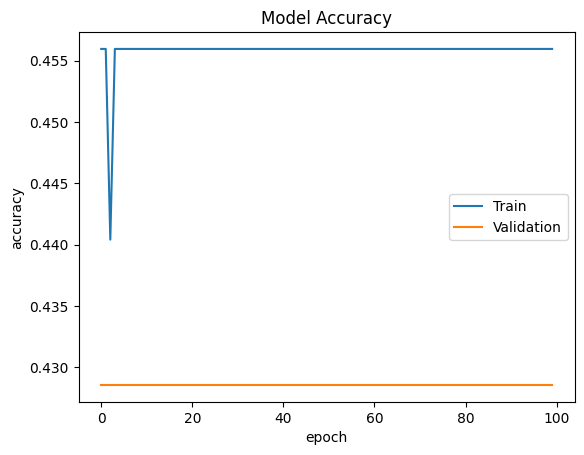

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

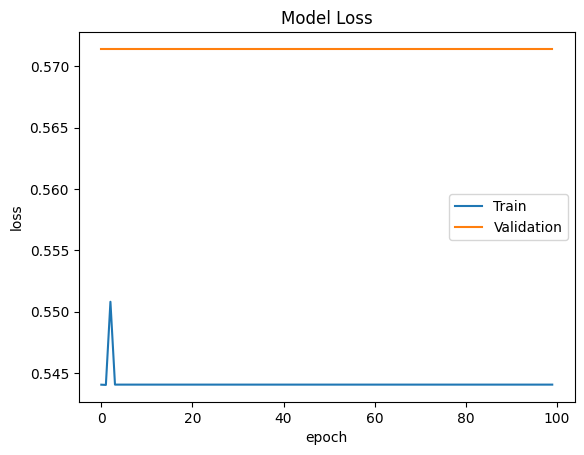

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Change

Dense = 16

In [44]:
model1 = Sequential()
model1.add(Dense(16, input_dim=13, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [45]:
model1.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
9/9 [==============================] - 1s 1ms/step - loss: 0.5496 - accuracy: 0.4504
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.4504
Epoch 3/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.4504
Epoch 4/10
9/9 [==============================] - 0s 1ms/step - loss: 0.5424 - accuracy: 0.4545
Epoch 5/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.5496
Epoch 6/10
9/9 [==============================] - 0s 1ms/step - loss: 0.3933 - accuracy: 0.5620
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.5826
Epoch 8/10
9/9 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.5372
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.5868
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.5785


In [46]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3022 - accuracy: 0.6393


[0.3022478520870209, 0.6393442749977112]

In [47]:
history1 = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.4560 - val_loss: 0.5714 - val_accuracy: 0.4286
Epoch 8/100
2

In [48]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                224       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


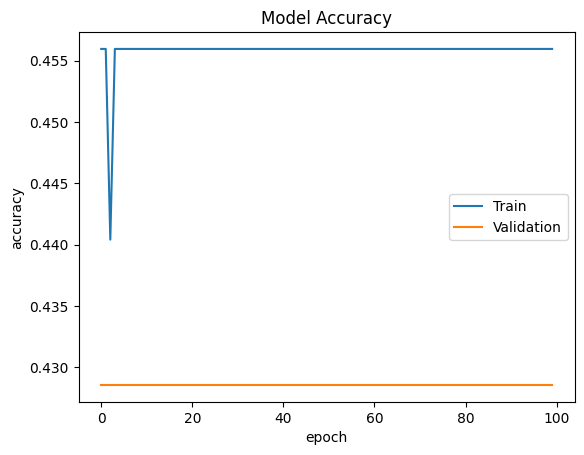

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [54]:
model3 = Sequential()
model3.add(Dense(64, input_dim=13, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [55]:
model3.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=10, batch_size=30, verbose=1)

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 0.4807 - accuracy: 0.5124
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.5496
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.5579
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.5331
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.5702
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.5950
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.6281
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 0.2949 - accuracy: 0.6405
Epoch 9/10
9/9 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.6322
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.5909


In [56]:
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.2396 - accuracy: 0.6721


[0.239635169506073, 0.6721311211585999]

In [57]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                896       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


### Change Epochs